In [1]:
%pip install kshape

  Created wheel for kshape: filename=kshape-1.0.1-py3-none-any.whl size=4613 sha256=fb7b760ac6a46b37ae0fd17810e6a23e4a4843db00c30addc93fc739601a4276
  Stored in directory: c:\users\benja\appdata\local\pip\cache\wheels\88\84\cc\683740a3917f48d0dab1e744f217be9403082bbb619c5d7e42
Successfully built kshape
Note: you may need to restart the kernel to use updated packages.


In [1]:
from common_imports import *

In [11]:
from kshape.core import kshape, zscore

In [2]:
# cc = counter('count-cooc-2pct-250')
cc = counter('count2-pruned')

Loading count2-pruned from disk...


In [2]:
len(cc.items('t'))

NameError: name 'cc' is not defined

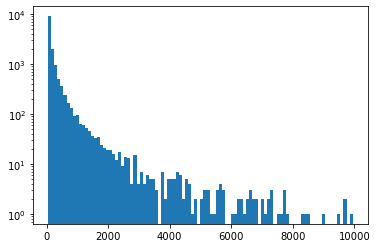

In [9]:
tc = cc.counts[('t',)]
plt.hist(tc[tc<10000], bins=100, log=True);

# cluster the top 1% using KShape

In [52]:
cutoffq = 0.99
cutoff = np.quantile( cc.counts[('t',)], cutoffq )
print(f"Setting {cutoffq:0.1%} percentile at {cutoff:0,.0f} total citations.")

Setting 99.0% percentile at 3,419 total citations.


In [54]:
ts_to_cluster = [t for t in cc.items('t') if cc(t=t) > cutoff]
print(f"{len(ts_to_cluster)} time series total.")

143 time series total.


In [57]:
time_series = [ [cc(t=t, fy=Y) for Y in range(1970, 2015)] for t in ts_to_cluster ]

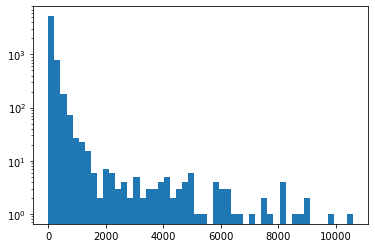

In [58]:
plt.hist( [y for x in time_series for y in x], bins=50, log=True );

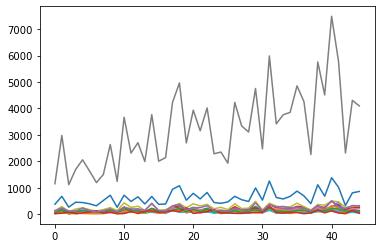

In [59]:
for ts in time_series[:15]:
    plt.plot(ts);

In [104]:
np.array(time_series).shape

(1428, 45)

In [119]:
cluster_num = 5
clusters = kshape(zscore(time_series, axis=1), cluster_num)

In [120]:
len(clusters)

5

In [121]:
[len(x[1]) for x in clusters]

[493, 137, 309, 247, 242]

In [122]:
from IPython.display import display, Markdown

# Cluster 0

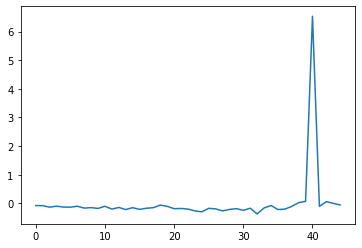

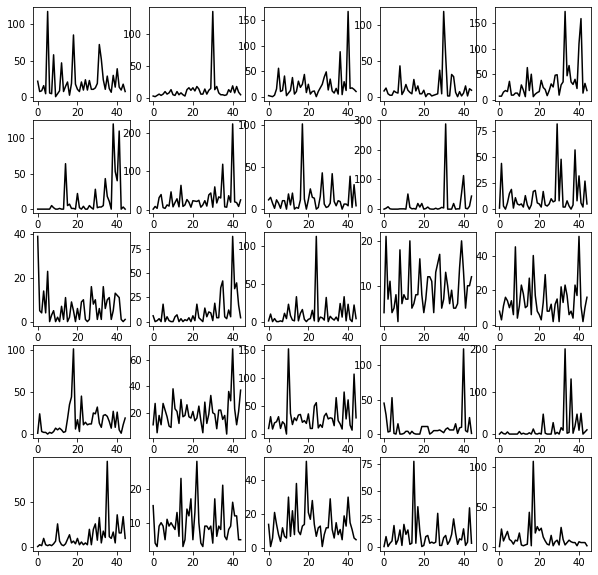

# Cluster 1

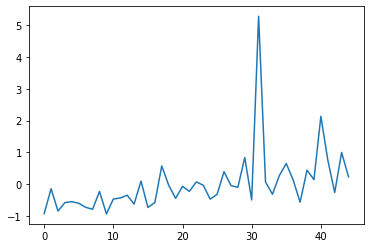

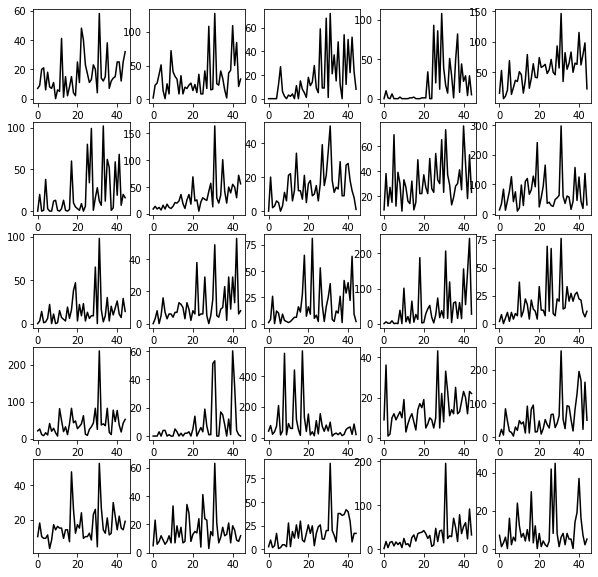

# Cluster 2

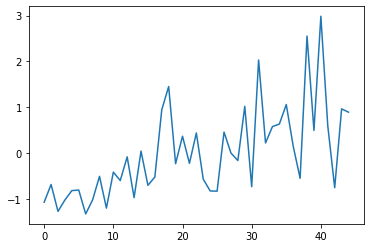

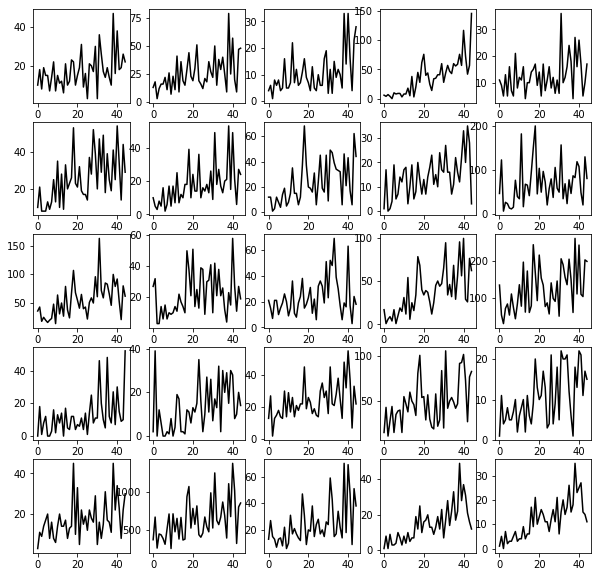

# Cluster 3

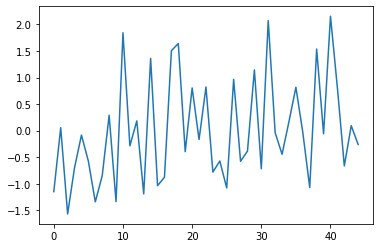

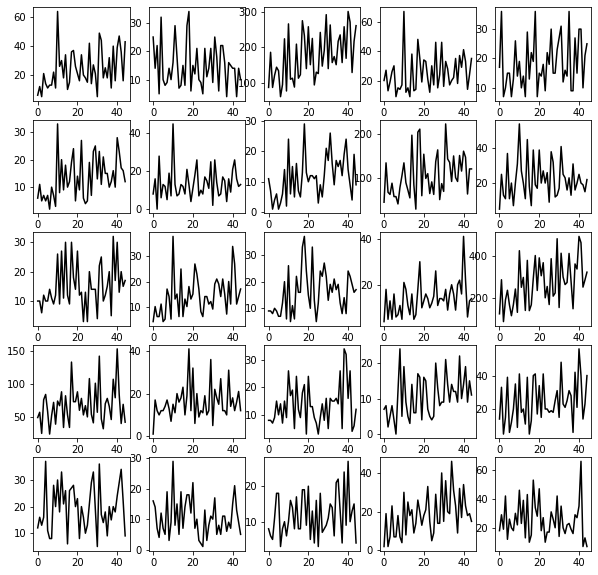

# Cluster 4

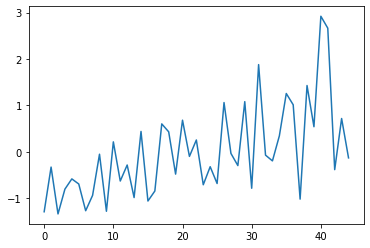

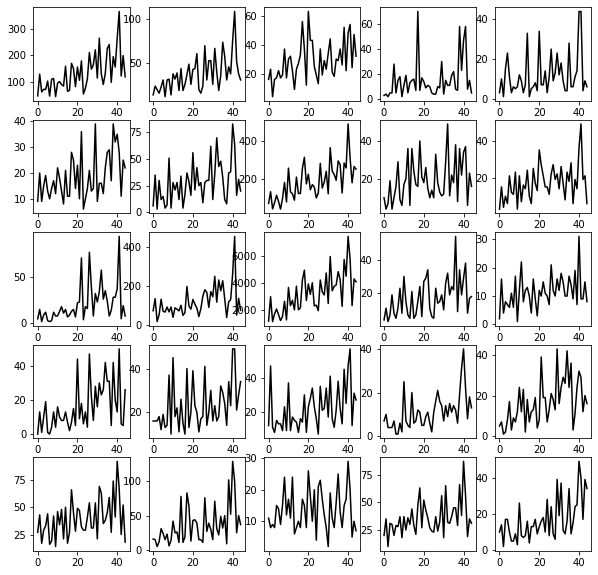

In [123]:
for ci in range(len(clusters)):
    display(Markdown(f"# Cluster {ci}"))
    
    c = clusters[ci]

    plt.plot(c[0]); # reference. mean.
    plt.show()

    plt.figure(figsize=(10,10)) # examples.
    for ti,ts in enumerate(c[1][:25]):
        plt.subplot(5,5,ti+1)
        plt.plot(time_series[ts], color='black')
        
    plt.show()

# let's try smoothing or windowing, and taking percentages

In [124]:
cutoffq = 0.9
cutoff = np.quantile( cc.counts[('t',)], cutoffq )
print(f"Setting {cutoffq:0.1%} percentile at {cutoff:0,.0f} total citations.")

Setting 90.0% percentile at 536 total citations.


In [125]:
ts_to_cluster = [t for t in cc.items('t') if cc(t=t) > cutoff]
print(f"{len(ts_to_cluster)} time series total.")

1428 time series total.


In [126]:
time_series = np.array([ [cc(t=t, fy=Y) for Y in range(1970, 2015)] for t in ts_to_cluster ])
year_totals = np.sum(time_series, axis=0)

In [127]:
time_seriesp = time_series / year_totals[np.newaxis,:]

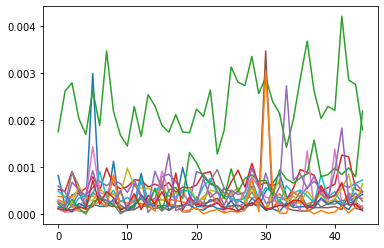

In [128]:
for ts in time_seriesp[:15]:
    plt.plot(ts);

In [169]:
window_size = 5
time_seriespw = np.array([ [
    sum( cc(t=t, fy=Y) for Y in range(YS, YS+window_size) ) / np.sum( year_totals[YS-1970:YS-1970+window_size] )
    for YS in range(1970, 2010+window_size, window_size)
] for t in ts_to_cluster ])

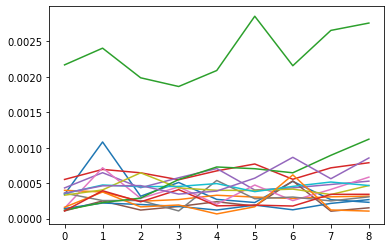

In [170]:
for ts in time_seriespw[:15]:
    plt.plot(ts);

In [179]:
cluster_num = 30
#ps_int = np.array(time_seriespw*1e4, dtype=np.int64)
zs = zscore(time_seriespw, axis=1)

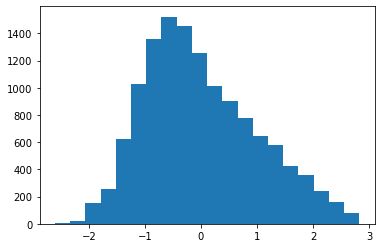

In [182]:
plt.hist(zs.flatten(), bins=20);
plt.show()
#plt.hist(ps_int, bins=100);
#plt.show()

In [183]:
clusters = kshape(zs, cluster_num)

In [184]:
print([len(x[1]) for x in clusters])

[41,
 43,
 71,
 24,
 26,
 64,
 50,
 46,
 61,
 51,
 30,
 49,
 41,
 36,
 42,
 56,
 40,
 36,
 56,
 96,
 40,
 42,
 38,
 109,
 33,
 38,
 48,
 31,
 36,
 54]

In [185]:
from IPython.display import display, Markdown

# Cluster 0

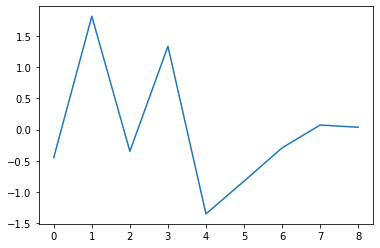

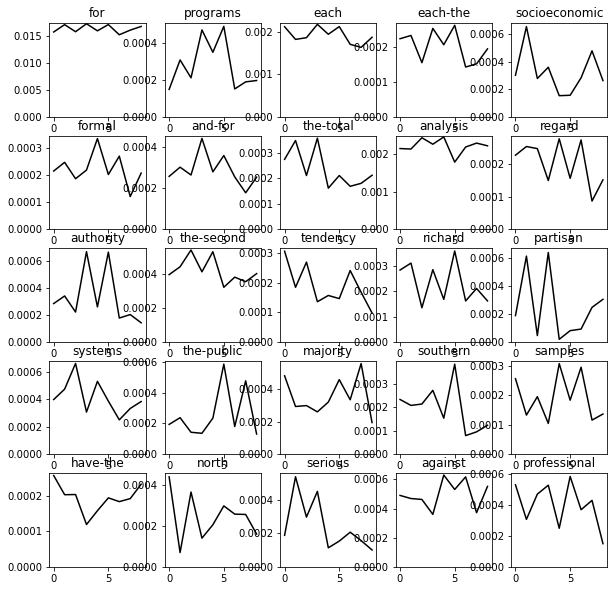

# Cluster 1

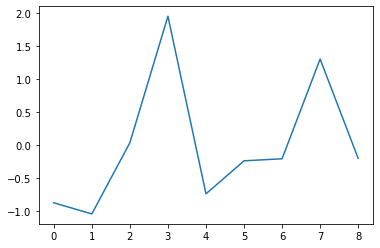

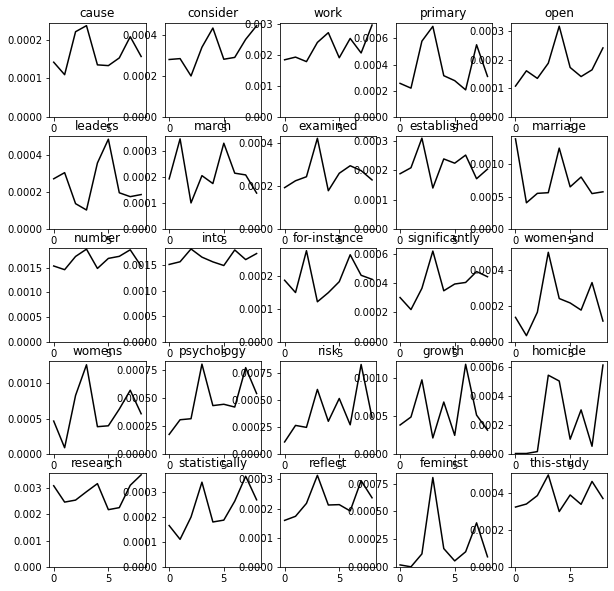

# Cluster 2

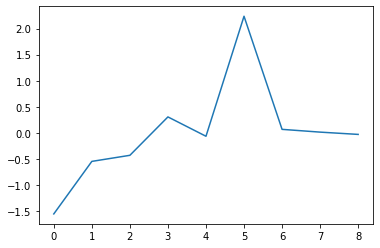

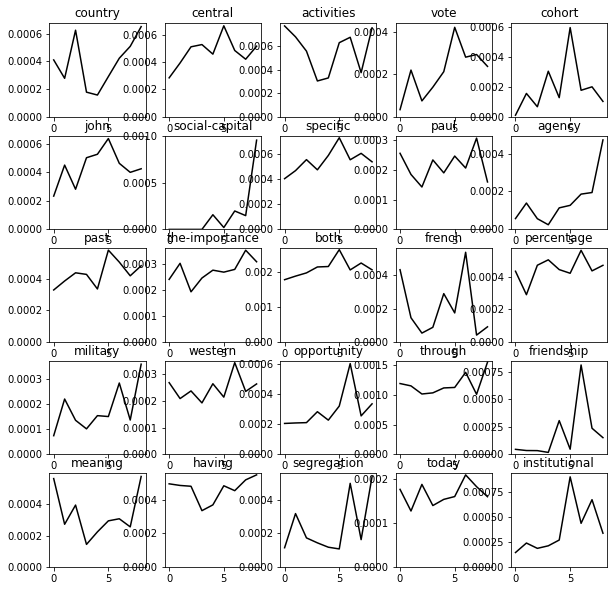

# Cluster 3

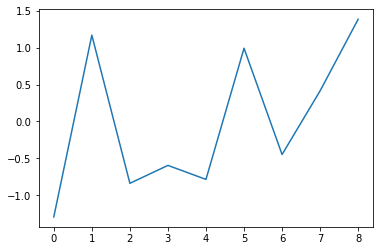

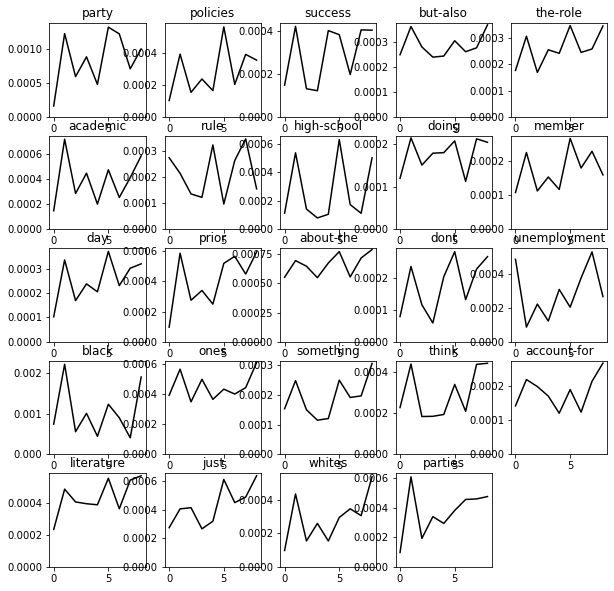

# Cluster 4

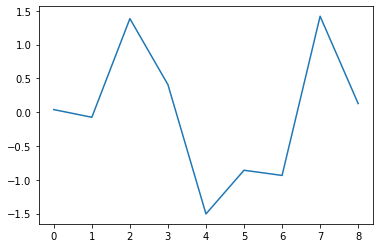

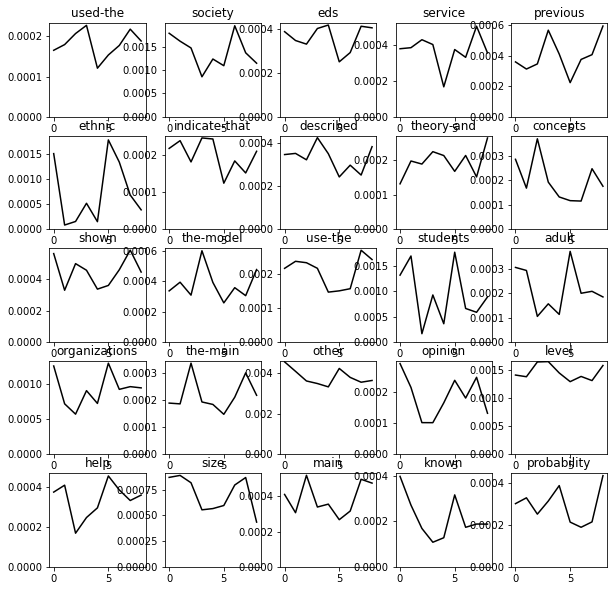

# Cluster 5

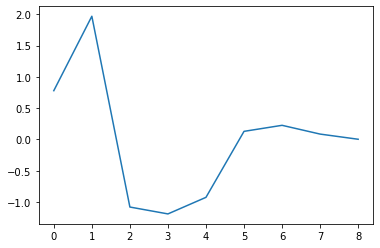

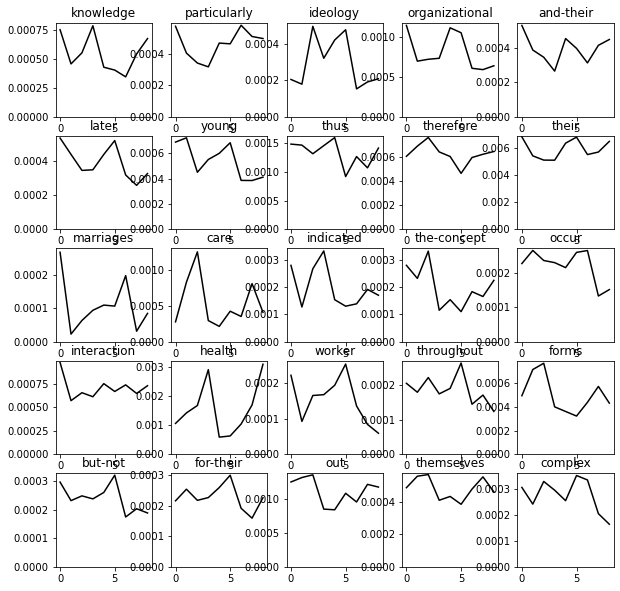

# Cluster 6

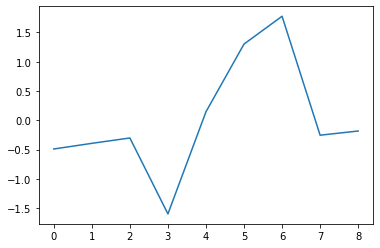

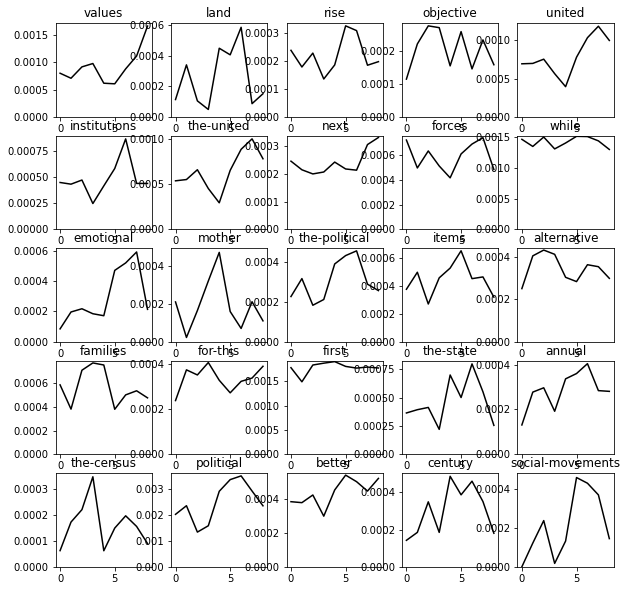

# Cluster 7

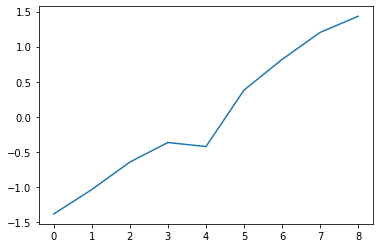

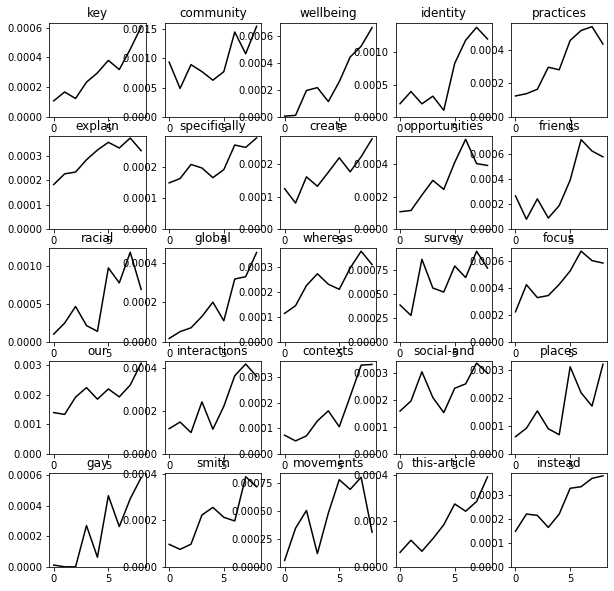

# Cluster 8

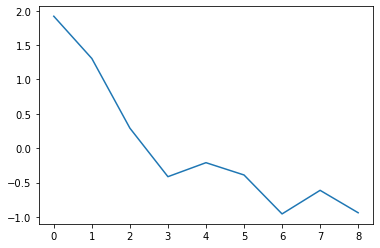

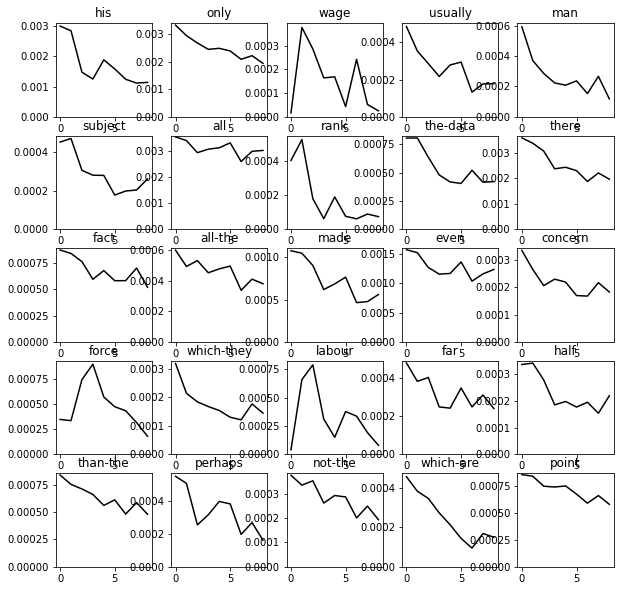

# Cluster 9

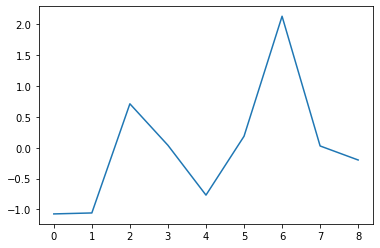

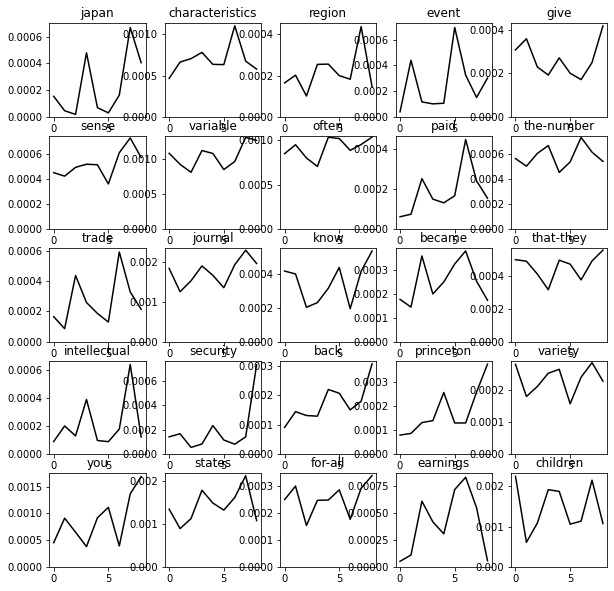

# Cluster 10

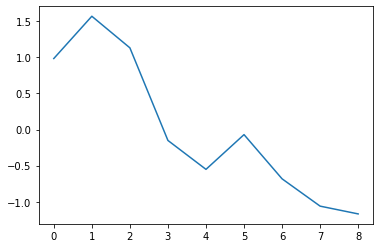

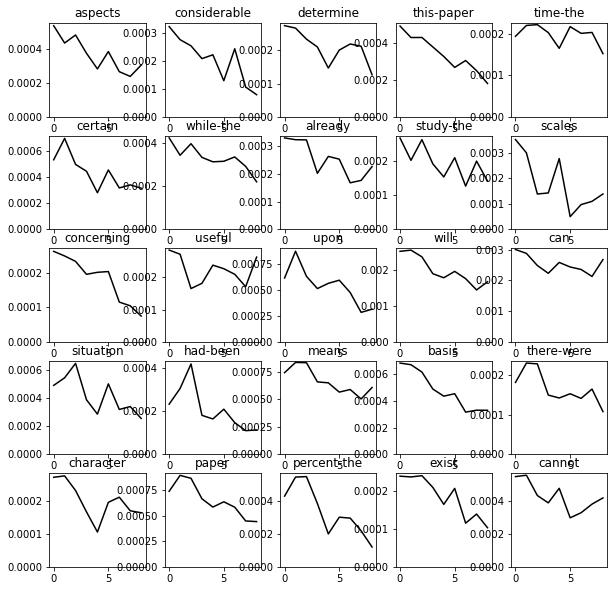

# Cluster 11

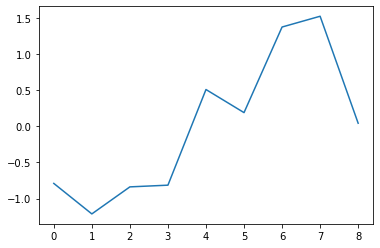

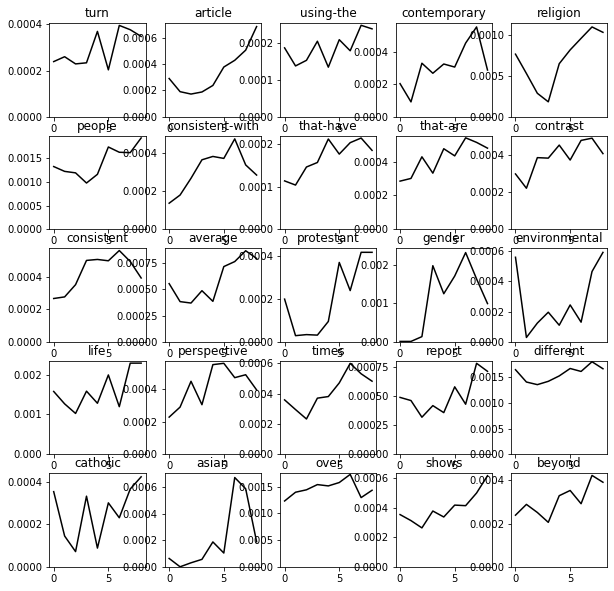

# Cluster 12

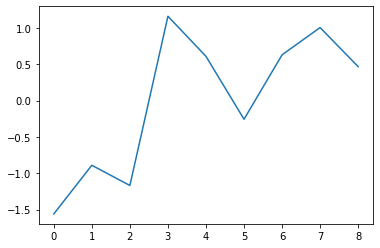

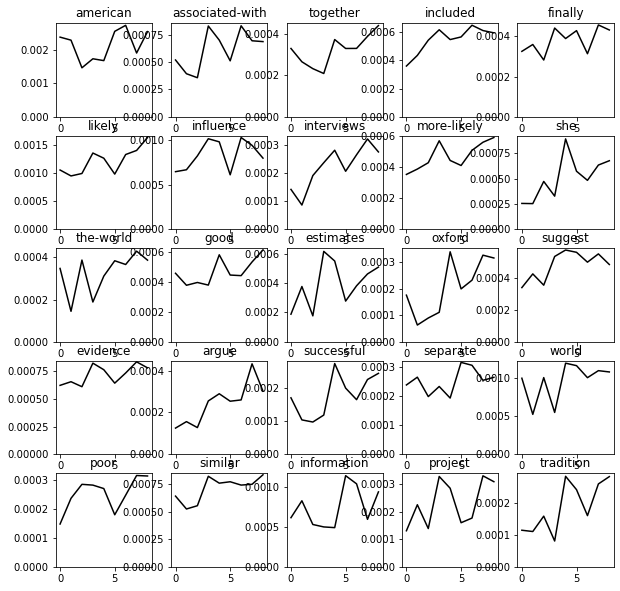

# Cluster 13

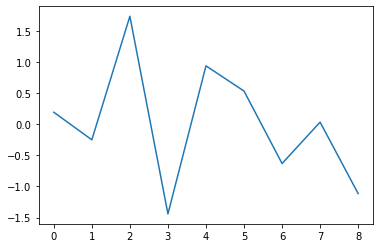

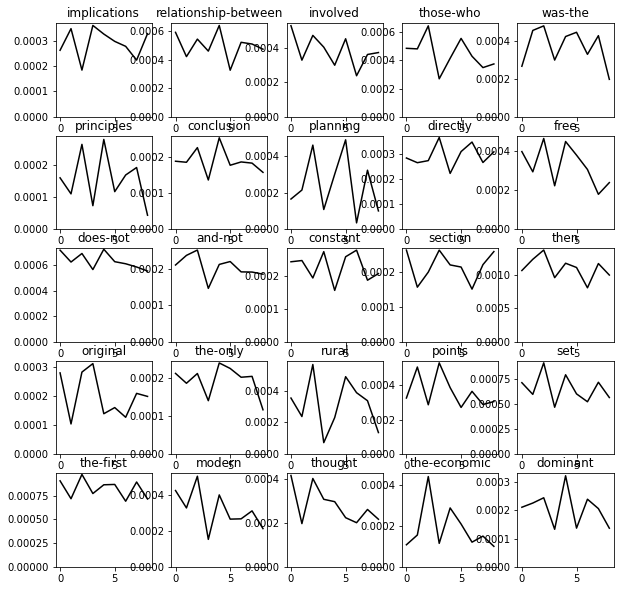

# Cluster 14

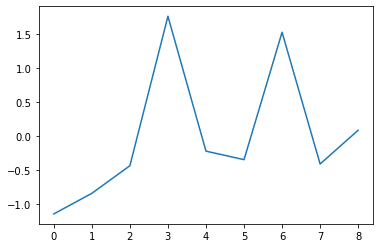

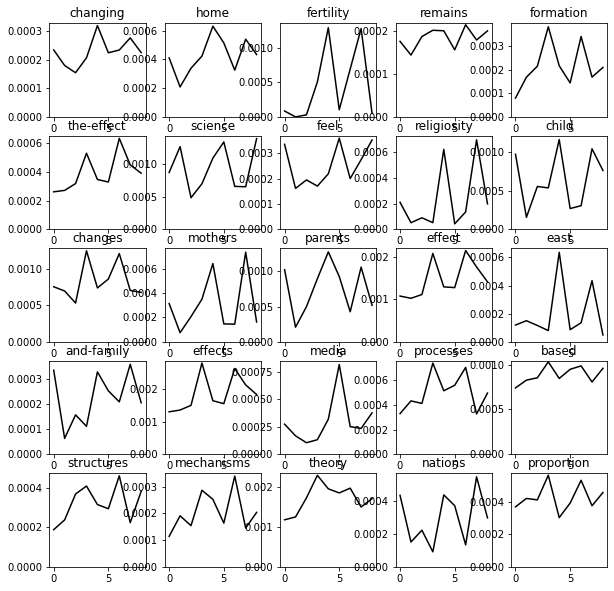

# Cluster 15

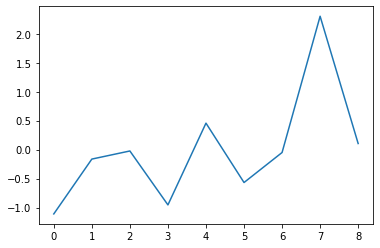

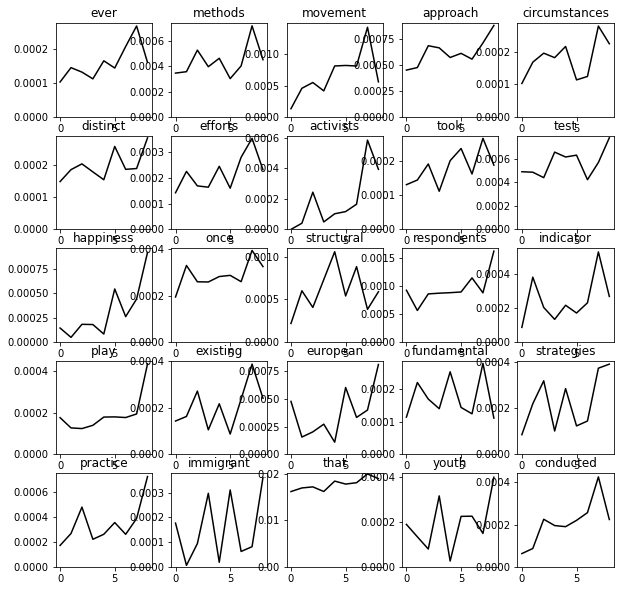

# Cluster 16

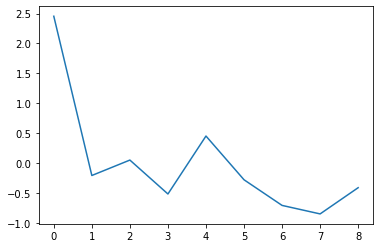

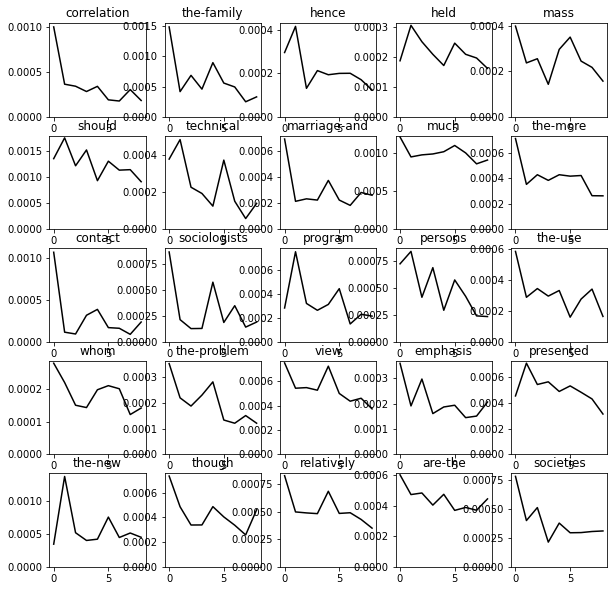

# Cluster 17

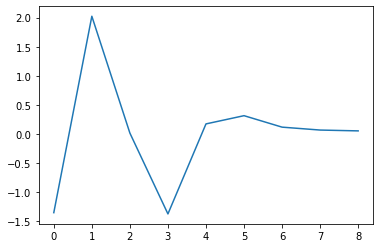

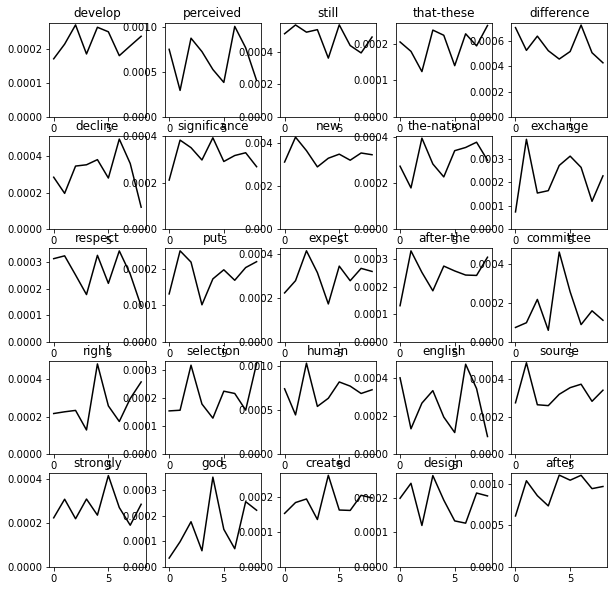

# Cluster 18

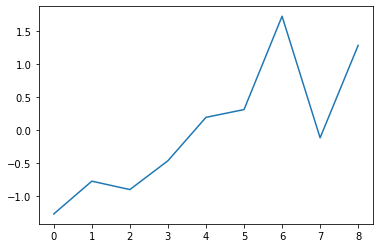

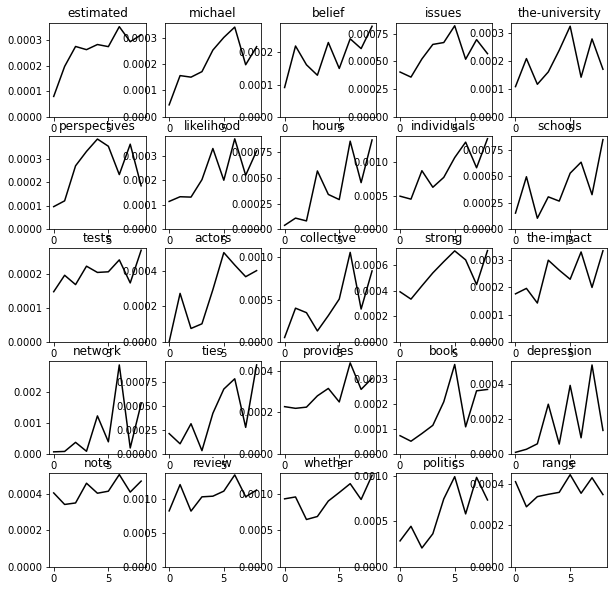

# Cluster 19

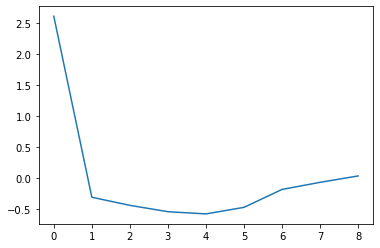

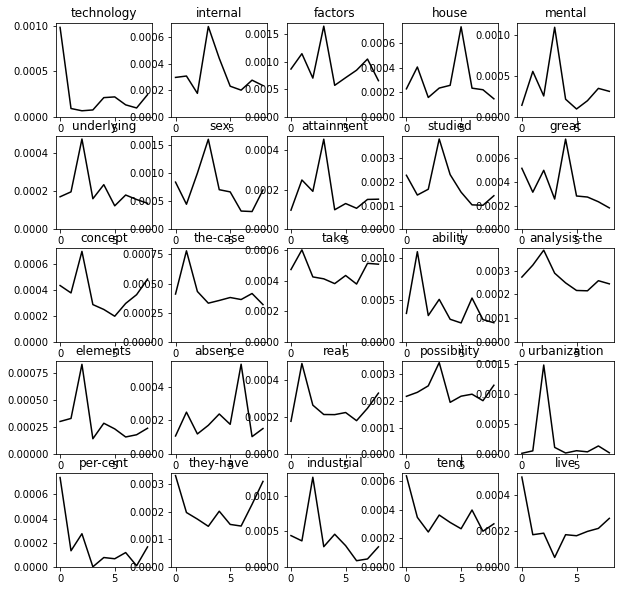

# Cluster 20

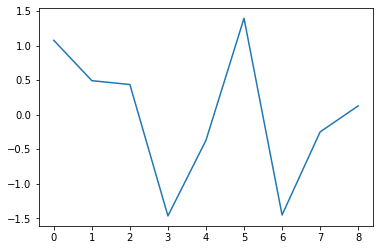

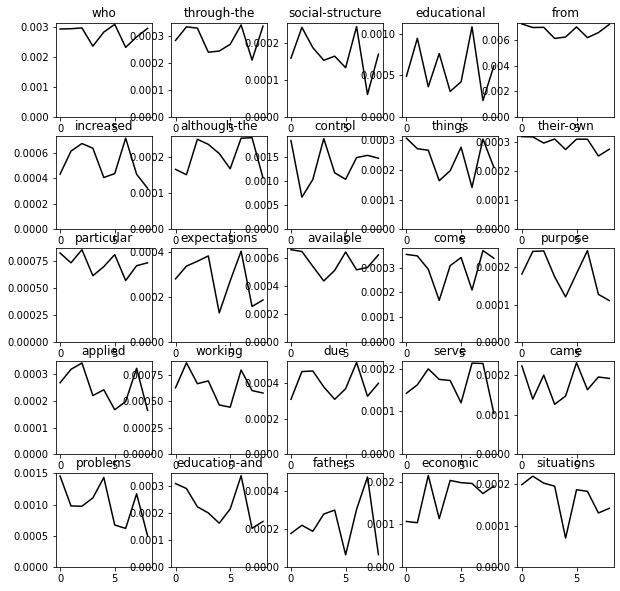

# Cluster 21

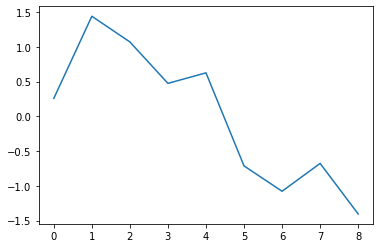

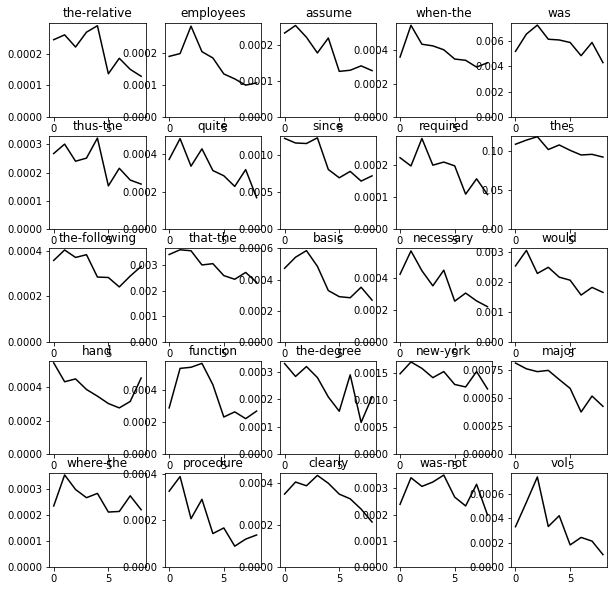

# Cluster 22

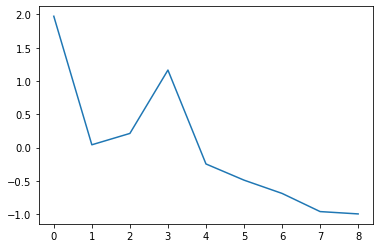

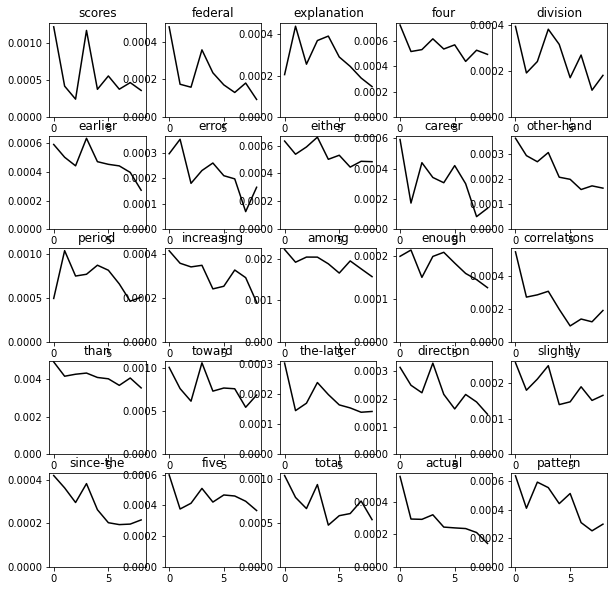

# Cluster 23

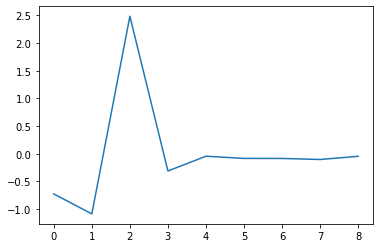

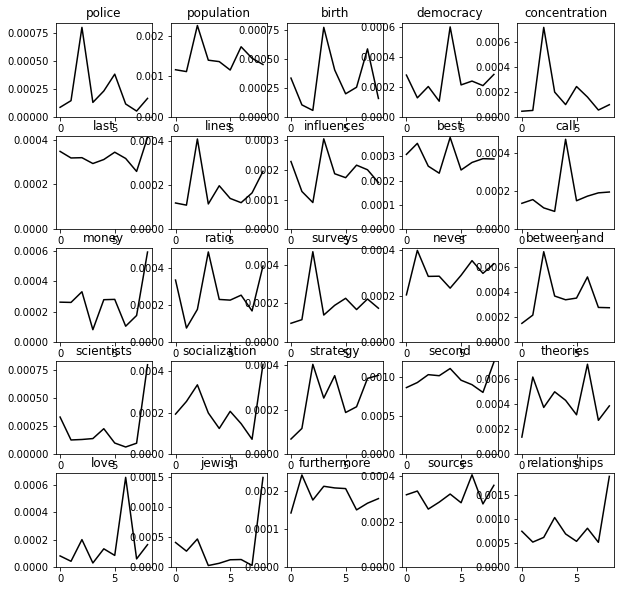

# Cluster 24

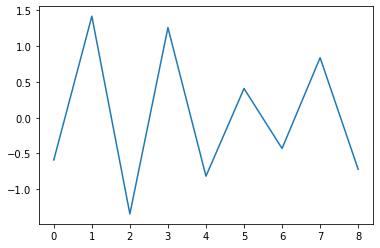

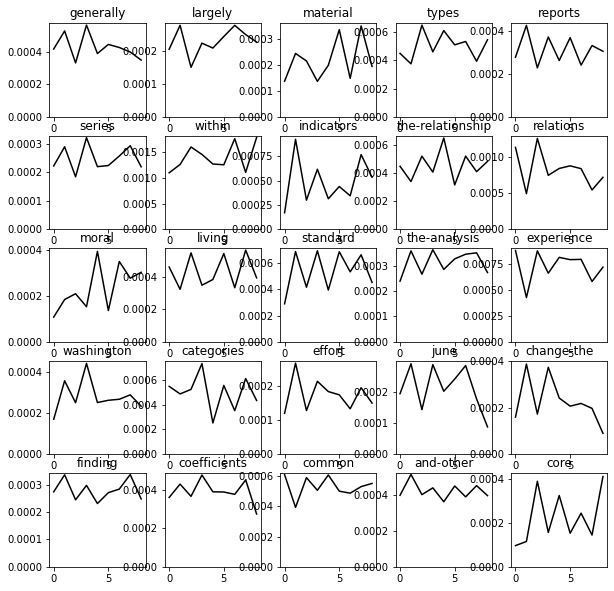

# Cluster 25

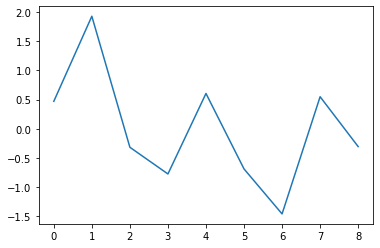

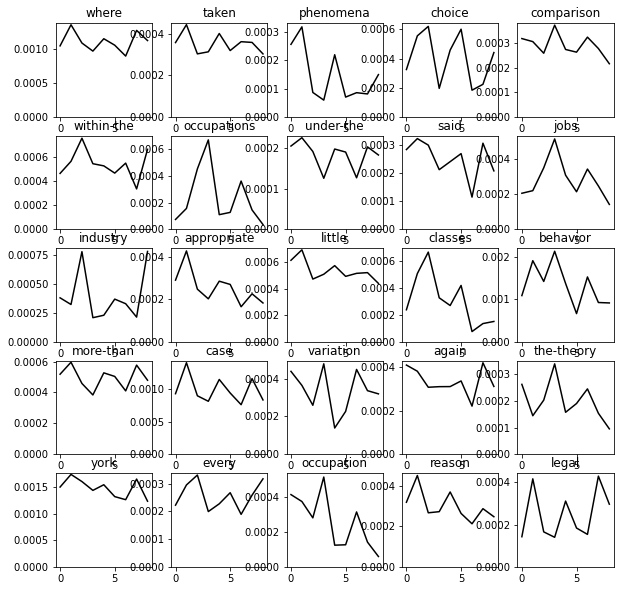

# Cluster 26

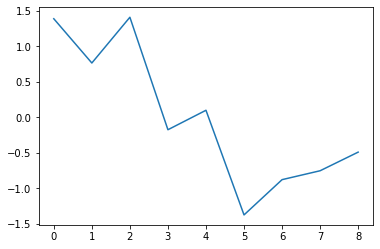

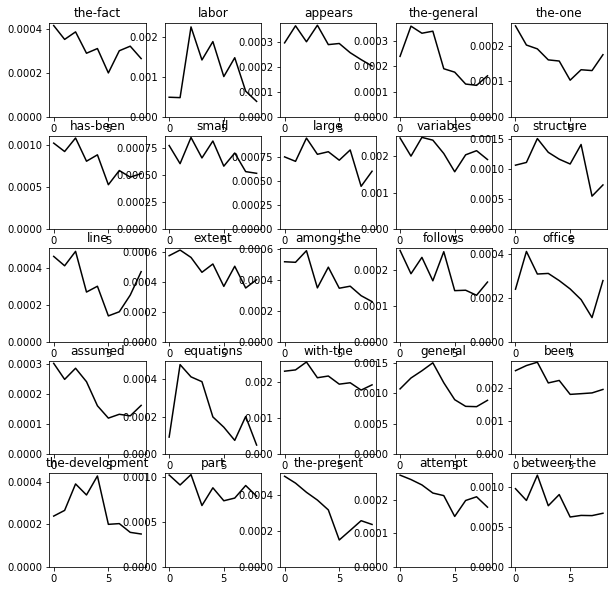

# Cluster 27

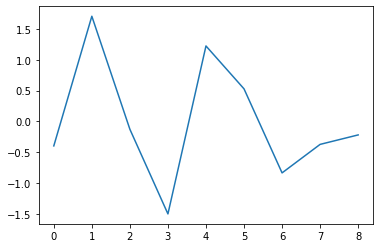

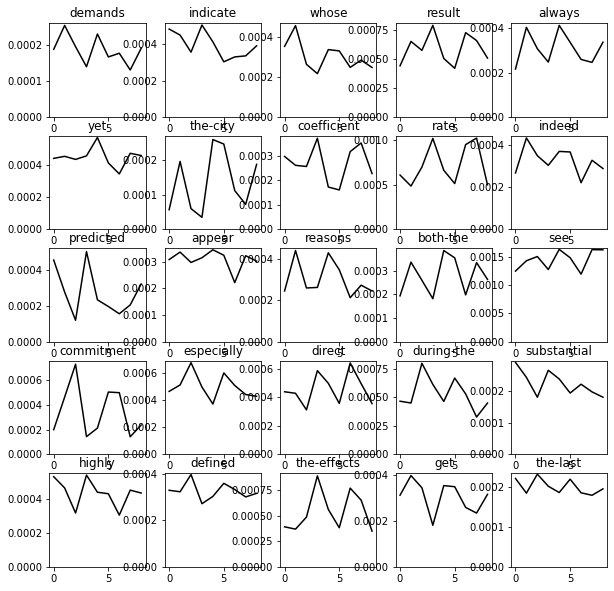

# Cluster 28

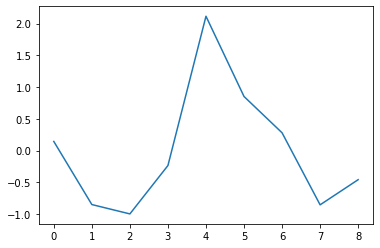

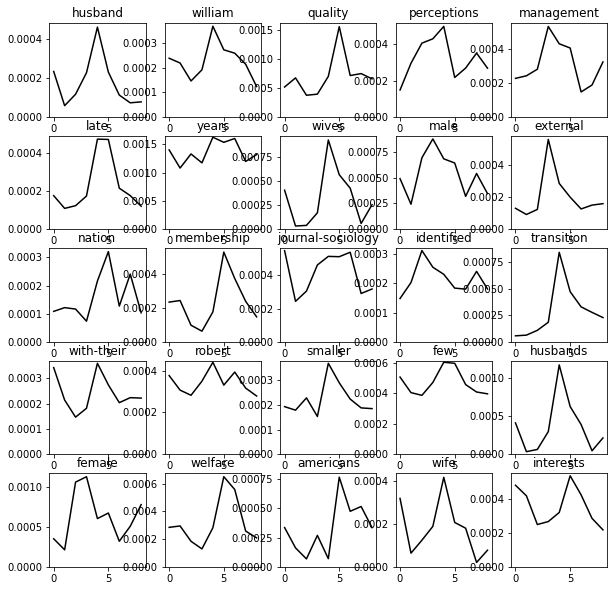

# Cluster 29

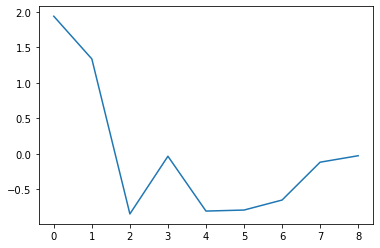

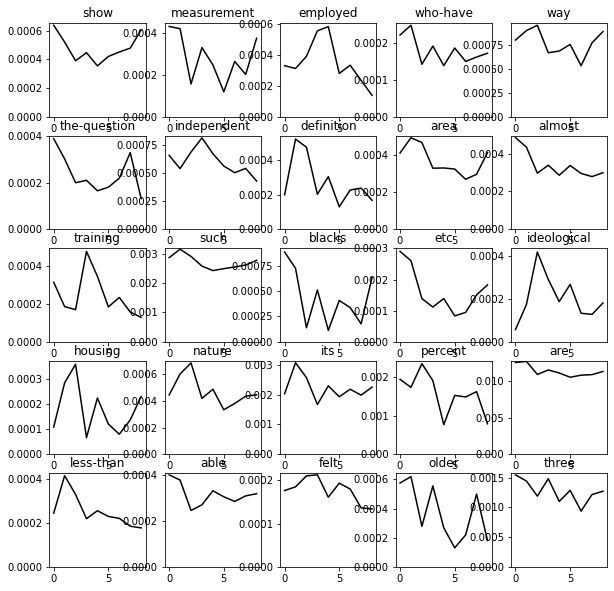

In [191]:
for ci in range(len(clusters)):
    display(Markdown(f"# Cluster {ci}"))
    
    c = clusters[ci]

    plt.plot(c[0]); # reference. mean.
    plt.show()

    plt.figure(figsize=(10,10)) # examples.
    for ti,ts in enumerate(sample(c[1],min(len(c[1]),25))):
        plt.subplot(5,5,ti+1)
        plt.plot(time_seriespw[ts], color='black')
        plt.title(ts_to_cluster[ts])
        plt.ylim(0,None)
        
    plt.show()